In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
path1 = r"D:\computer vision pranjal sir\Mask_NoMask" 
cate = ['Mask' , 'No_Mask']

In [3]:
for i in cate:
    folders = os.path.join(path1, i)
    print(folders)

D:\computer vision pranjal sir\Mask_NoMask\Mask
D:\computer vision pranjal sir\Mask_NoMask\No_Mask


In [4]:
image_size = 200

path1 = r"D:\computer vision pranjal sir\Mask_NoMask" 
cate = ['Mask' , 'No_Mask']

input_image = []  # empty list
for i in cate:
    folders = os.path.join(path1, i)
    label = cate.index(i)  # we need to tell software which image is of cat and which is of dog
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array , (image_size , image_size)) # resizing each image to 50 * 50)
        input_image.append([image_array , label])


In [5]:
# Check len of input image

len(input_image)

8838

In [6]:
# Shuffle mask and n0 mask images

np.random.shuffle(input_image)

In [7]:
# Make empty list to store train and test file

X = []
Y = []

In [8]:
for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [9]:
X = np.array(X)
Y = np.array(Y)

In [10]:
len(X)

8838

In [11]:
len(Y)

8838

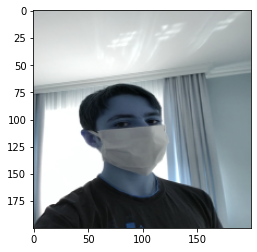

In [12]:
plt.imshow(X[8800])

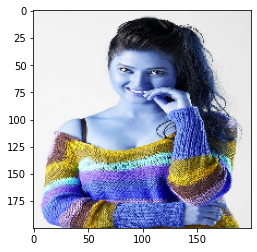

In [13]:
plt.imshow(X[87])

In [14]:
X = X/255  # drive by 255 as highest value any pixcell can take is 255

MemoryError: Unable to allocate 7.90 GiB for an array with shape (8838, 200, 200, 3) and data type float64

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from keras.utils import to_categorical

In [18]:
model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size = (3,3) , activation = 'relu' ,))
model.add(MaxPool2D(pool_size = (2,2)))  # 1 pair of conv and pooling


model.add(Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2)))  # 2nd pair of conv and pooling.....stacked

model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = X.shape[1:]))

model.add(Dense(2 , activation = 'softmax'))

In [19]:
# Compile a model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
# Fit model with X and Y

model.fit(X, Y ,epochs=1 , validation_split = 0.15 , batch_size = 32)

235/235 [==============================] - 104s 443ms/step - loss: 0.4191 - accuracy: 0.8642 - val_loss: 0.2375 - val_accuracy: 0.9118


In [21]:
model.save("my_mask_NoMask_model1.h5")  # saving a model

In [24]:
pwd

'C:\\Users\\shirish'

In [22]:
# Prediction

pred = model.predict_classes(X)
pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
from  sklearn.metrics import confusion_matrix, classification_report

mat = confusion_matrix(pred, Y)
mat

array([[4586,  406],
       [ 205, 3641]], dtype=int64)

In [24]:
mat.diagonal().sum() / mat.sum() * 100

93.08667119257751

# Face detection by using opencv

In [37]:
def  face_extractor(img):
    faces = face_cascade.detectMultiScale(img, scaleFactor = 1.5 , minNeighbors = 5)
    if faces is ():
        return None
    
    
    for (x ,y , w, h)  in faces:
        cv2.rectangle(img , (x,y) , (x+w , y+h), (0,0, 255) , 2)
        roi =  img[y :y+h , x:x+w]
    
    return roi

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-37-1191a396d2a9>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [33]:
from keras.models import load_model
from keras.preprocessing import image

In [36]:
face_cascade =  cv2.CascadeClassifier(r"C:/Users/mayur/Downloads/haarcascade_frontalcatface.xml")
model = load_model("my_mask_NoMask_model1.h5") 

video_capture =cv2.VideoCapture(0)
while True:
    ret,frame = video_capture.read()
    
    face = face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face , (200,200))
        im = Image.fromarray(face , 'RGB')
        
        
        img_array = np.array(im)
        
        img_array = np.expand_dims(img_array ,  axis = 0)
        pred = model.predict(img_array)
        print(pred)
        
        
        name = "None Matching"

        if pred[0][0]  > .5:
            name ="Masked"
        elif pred[0][1]  > .5:
            name = 'Mask is not there , Put on the mask' 
        cv2.putText(frame ,name , (75 , 75) , cv2.FONT_HERSHEY_COMPLEX , 1 , (255 , 0, 0) , 2)    
    else:
        cv2.putText(frame ,"Face not found" , (75 , 75 ) , cv2.FONT_HERSHEY_COMPLEX ,1 , (255 , 0, 0) , 2)
    cv2.imshow('Video' , frame)    
        
    if cv2.waitKey(20) & 0xff == ord('q') : 
        break
     
video_capture.release()
cv2.destroyAllWindows()


In [40]:
import cv2
import numpy as np
from keras.models import load_model

model=load_model("my_mask_NoMask_model1.h5")

results={0:'Mask  found',1:'Mask not found '}
GR_dict={0:(0,255,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0) 


haarcascade = cv2.CascadeClassifier(r"C:/Users/mayur/Downloads/haarcascade_frontalcatface.xml")
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(200,200))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,200,200,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)

    cv2.imshow('Liv Camera',   im)
    key = cv2.waitKey(10)
    
    if key == 27: # use the escape key
        break

cap.release()

cv2.destroyAllWindows()

In [ ]:
Y = Y.reshape(-1,)
Y[:5]

In [ ]:
# Predict y
y_pred = model.predict(X)
y_pred[:5]

In [ ]:
# Find out maximum value in arguments
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
Y[:5]

In [ ]:
classes={
   0:'No_Mask',
   1:'Mask',
}

In [ ]:
from PIL import Image

In [ ]:
img = Image.open(r"E:/Imarticus/Compputer Vision/man.jpeg")
img

In [ ]:
#img=img.resize((-1,32,32,3))
img=np.expand_dims(img,axis=0)
img=np.array(img)

In [ ]:
pred=model.predict_classes([img])[1]

In [ ]:
print(pred,classes[pred])

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 100 , kernel_size = (3,3) , activation = 'relu' ,))
model.add(MaxPool2D(pool_size = (2,2)))  # 1st

model.add(Conv2D(filters = 100 , kernel_size = (3,3) , activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2)))  # 2nd 

model.add(Conv2D(filters = 100 , kernel_size = (3,3) , activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2)))  # 3rd 

model.add(Conv2D(filters = 100 , kernel_size = (3,3) , activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2)))  # 4th 

model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = X.shape[1:]))


model.add(Dense(2 , activation = 'softmax'))

In [ ]:
# Compile a model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Fit model with X and Y

#model.fit(X, Y ,epochs=5 , validation_split = 0.15 , batch_size = 32)


model.fit(X, Y ,epochs=5)